In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

1. Construct simple polynomial regression models using the independent variables: cyl, disp, hp, drat, wt, and qsec. In each model, use mpg as the dependent variable. Determine the optimal polynomial degree for each variable based on quality criteria and visualize the results.

In [2]:
mtcars = pd.read_csv('mtcars.csv')

mtcars_short = mtcars.iloc[:, :7]

y = mtcars_short['mpg']

mtcars_short['hp1'] = mtcars_short['hp'] ** 1
mtcars_short['hp2'] = mtcars_short['hp'] ** 2
mtcars_short['hp3'] = mtcars_short['hp'] ** 3
mtcars_short['hp4'] = mtcars_short['hp'] ** 4

mtcars_short['wt1'] = mtcars_short['wt'] ** 1
mtcars_short['wt2'] = mtcars_short['wt'] ** 2
mtcars_short['wt3'] = mtcars_short['wt'] ** 3
mtcars_short['wt4'] = mtcars_short['wt'] ** 4

mtcars_short['cyl1'] = mtcars_short['cyl'] ** 1
mtcars_short['cyl2'] = mtcars_short['cyl'] ** 2
mtcars_short['cyl3'] = mtcars_short['cyl'] ** 3
mtcars_short['cyl4'] = mtcars_short['cyl'] ** 4

mtcars_short['disp1'] = mtcars_short['disp'] ** 1
mtcars_short['disp2'] = mtcars_short['disp'] ** 2
mtcars_short['disp3'] = mtcars_short['disp'] ** 3
mtcars_short['disp4'] = mtcars_short['disp'] ** 4

mtcars_short['drat1'] = mtcars_short['drat'] ** 1
mtcars_short['drat2'] = mtcars_short['drat'] ** 2
mtcars_short['drat3'] = mtcars_short['drat'] ** 3
mtcars_short['drat4'] = mtcars_short['drat'] ** 4

mtcars_short['qsec1'] = mtcars_short['qsec'] ** 1
mtcars_short['qsec2'] = mtcars_short['qsec'] ** 2
mtcars_short['qsec3'] = mtcars_short['qsec'] ** 3
mtcars_short['qsec4'] = mtcars_short['qsec'] ** 4


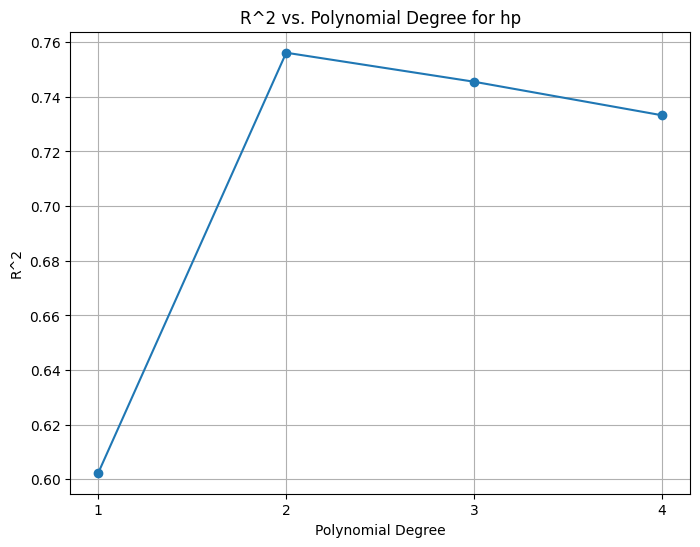

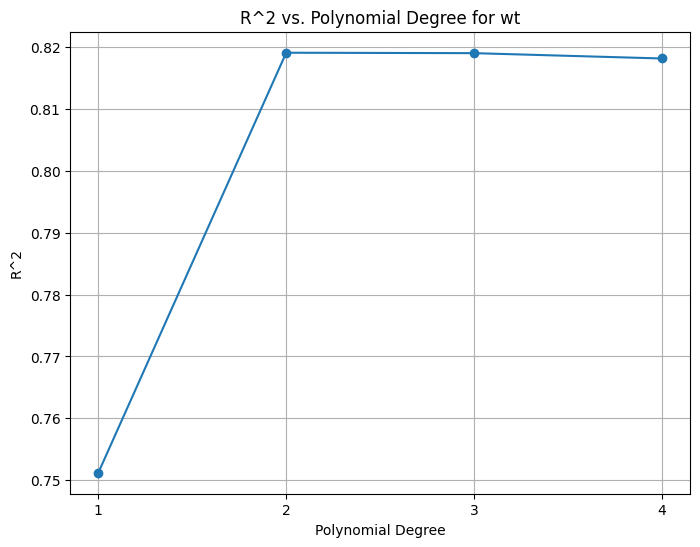

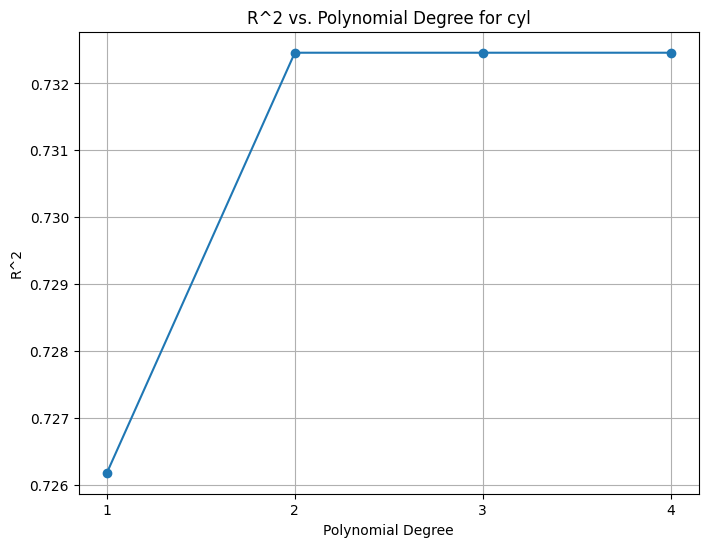

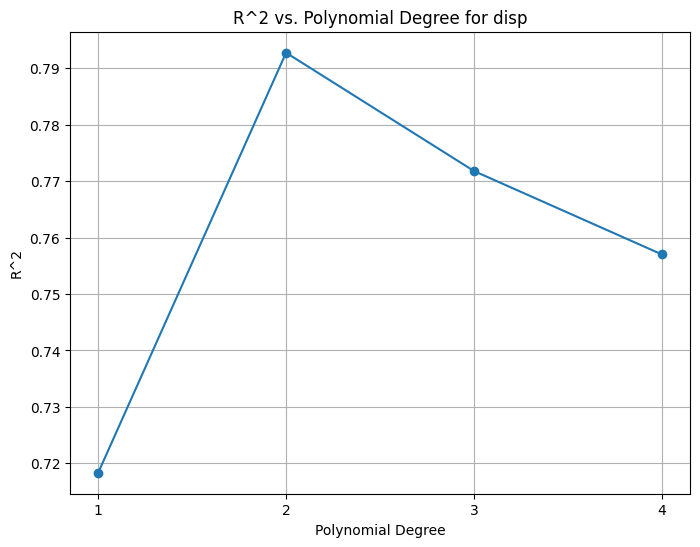

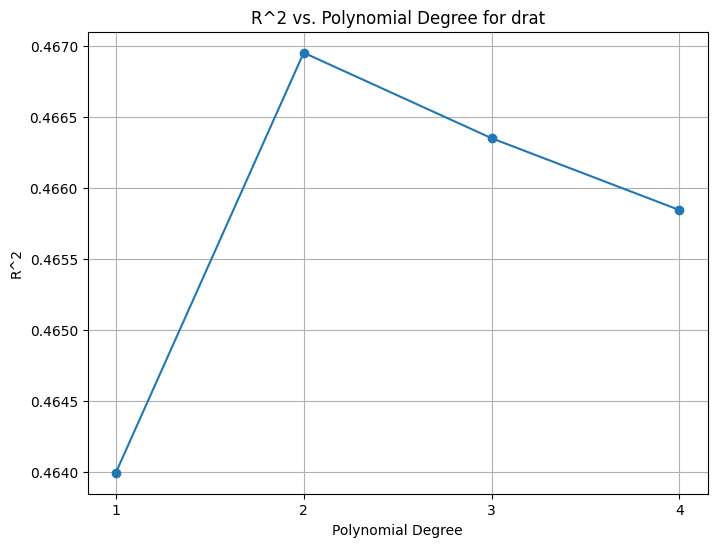

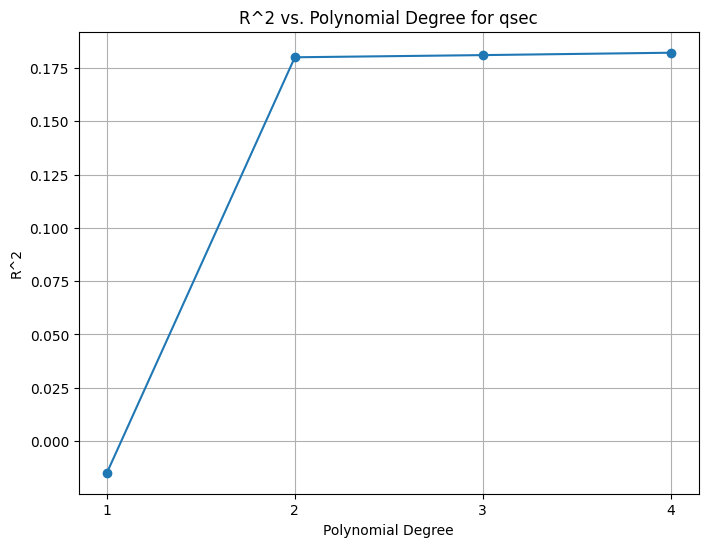

In [4]:
variables = ['hp', 'wt', 'cyl', 'disp', 'drat', 'qsec']

for variable in variables:
    r2_values = []

    degrees = range(1, 5)

    for degree in degrees:
        X_variable = mtcars_short[[variable] + [f'{variable}{degree}']]
        X_variable = sm.add_constant(X_variable)

        model = LinearRegression().fit(X_variable, y)
        y_pred = model.predict(X_variable)

        r2 = r2_score(y, y_pred)
        r2_values.append(r2)

    # Vykreslení grafu
    plt.figure(figsize=(8, 6))
    plt.plot(degrees, r2_values, marker='o', linestyle='-')
    plt.title(f'R^2 vs. Polynomial Degree for {variable}')
    plt.xlabel('Polynomial Degree')
    plt.ylabel('R^2')
    plt.xticks(degrees)
    plt.grid(True)
    plt.show()

2. Based on the findings from the previous step, develop a multiple regression model. Compute the relevant quality criteria for the regression.

In [6]:
X = mtcars_short[['hp', 'hp2', 'wt', 'wt2', 'cyl', 'cyl2', 'disp', 'disp2', 'drat', 'drat2', 'qsec', 'qsec2', 'qsec3', 'qsec4']] 

X = sm.add_constant(X)

model = LinearRegression().fit(X, y)

y_pred = model.predict(X)

In [7]:
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

X_poly_sm = sm.add_constant(X) 
model_sm = sm.OLS(y, X_poly_sm).fit()

aic = model_sm.aic
bic = model_sm.bic

print(f"Mean Squared Error (MSE): {mse}")
print(f"Determination Index (R^2): {r2}")
print(f"Akaike Information Criterion (AIC): {aic}")
print(f"Bayesian Information Criterion (BIC): {bic}")

Mean Squared Error (MSE): 3.2025696329885363
Determination Index (R^2): 0.908989401693583
Akaike Information Criterion (AIC): 158.05857805707564
Bayesian Information Criterion (BIC): 180.04461659907153
